In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/GlobalLandTemperaturesByCity.csv')

# Show first few rows to understand structure
print(df.head())

# Drop rows with missing temperature data
df = df.dropna(subset=['AverageTemperature'])

# Convert 'dt' column to datetime format
df['dt'] = pd.to_datetime(df['dt'])

# Extract year and month for analysis
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

# Get unique list of countries
countries = sorted(df['Country'].unique())

# Print total and list
print(f"\n Total Countries in Dataset: {len(countries)}\n")
print("Country List:")
for country in countries:
    print("-", country)

           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  

 Total Countries in Dataset: 159

Country List:
- Afghanistan
- Albania
- Algeria
- Angola
- Argentina
- Armenia
- Australia
- Austria
- Azerbaijan
- Bahamas
- Bahrain
- Bangladesh
- Belarus
- Belgium
- Benin
- Bolivia
- Bosnia And Herzegovina
- Botswana
- Brazil
- Bulgaria
- Burkina Faso
- Burma
- Burundi
- Cambodia
- Cameroon
- Canada
- Central African

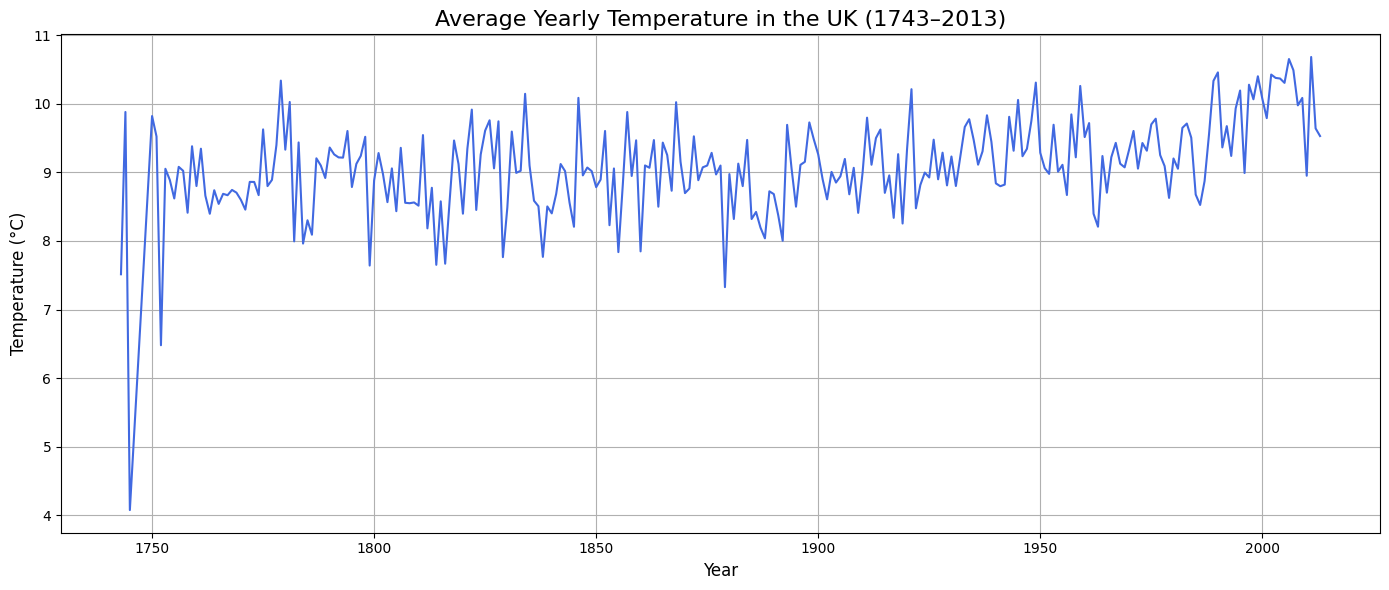

In [48]:
# Filter data for a specific country: India
df_UK = df[df['Country'] == 'United Kingdom']

#Calculate Yearly Average Temperature for UK
yearly_avg = df_UK.groupby('Year')['AverageTemperature'].mean().reset_index()

# Plot yearly average temperature
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_avg, x='Year', y='AverageTemperature', color='royalblue')
plt.title('Average Yearly Temperature in the UK (1743–2013)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-49-bf6971e32eb3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')


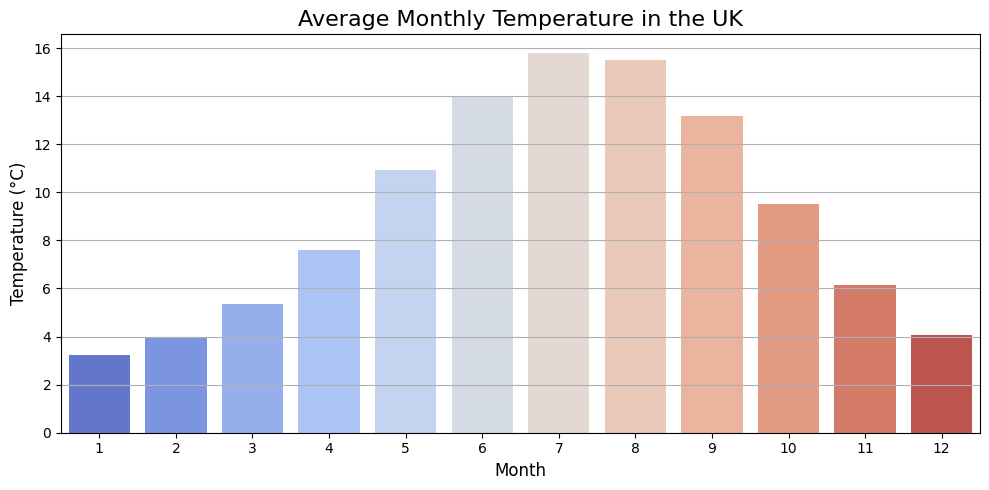

In [49]:
# Monthly Average Temperature Trend (Seasonal Insight)
monthly_avg = df_UK.groupby('Month')['AverageTemperature'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')
plt.title('Average Monthly Temperature in the UK', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


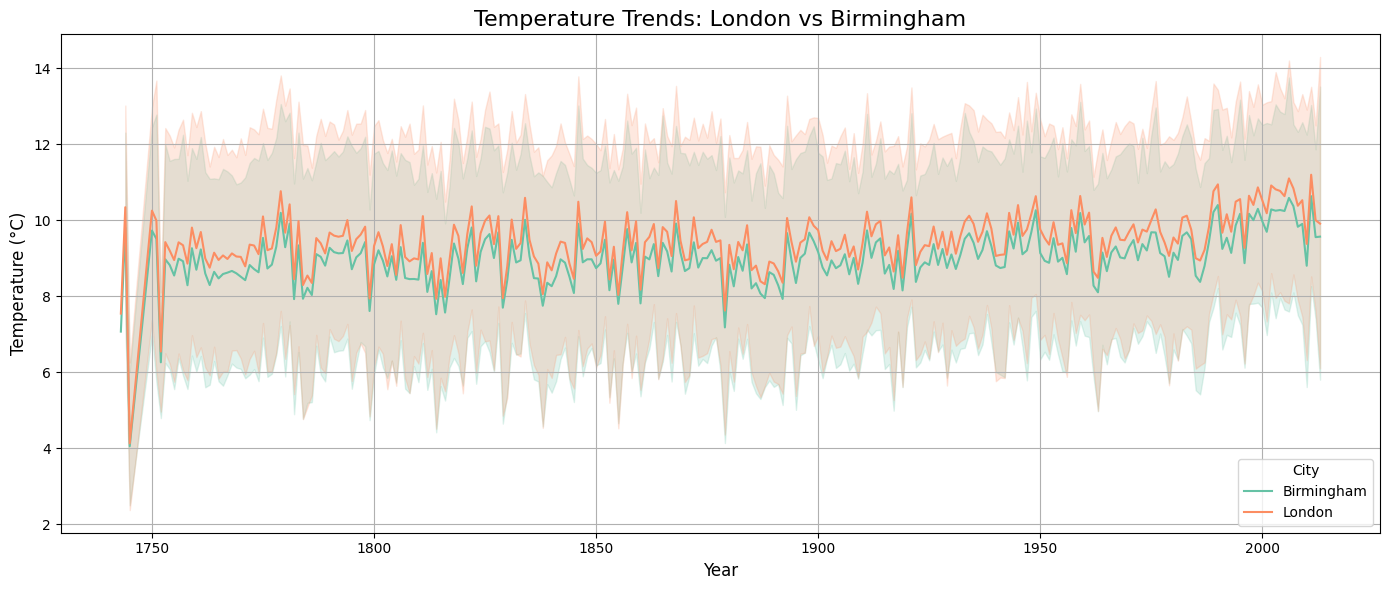

In [50]:
# Compare temperature trends between London and Birmingham
cities = ['London', 'Birmingham']

# Filter the UK data for selected cities
df_cities = df_UK[df_UK['City'].isin(cities)]

# Plot temperature trends over years for each city
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_cities, x='Year', y='AverageTemperature', hue='City', palette='Set2')
plt.title('Temperature Trends: London vs Birmingham', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# Linear Regression: Prepare data for prediction
recent_data = yearly_avg[yearly_avg['Year'] >= 1950]
X = recent_data['Year'].values.reshape(-1, 1)  # Input (year)
y = recent_data['AverageTemperature'].values   # Output (temperature)



Linear Regression Predicted Temperature for the UK in 2022: 10.24 °C
Linear Regression Predicted Temperature for the UK in 2023: 10.26 °C


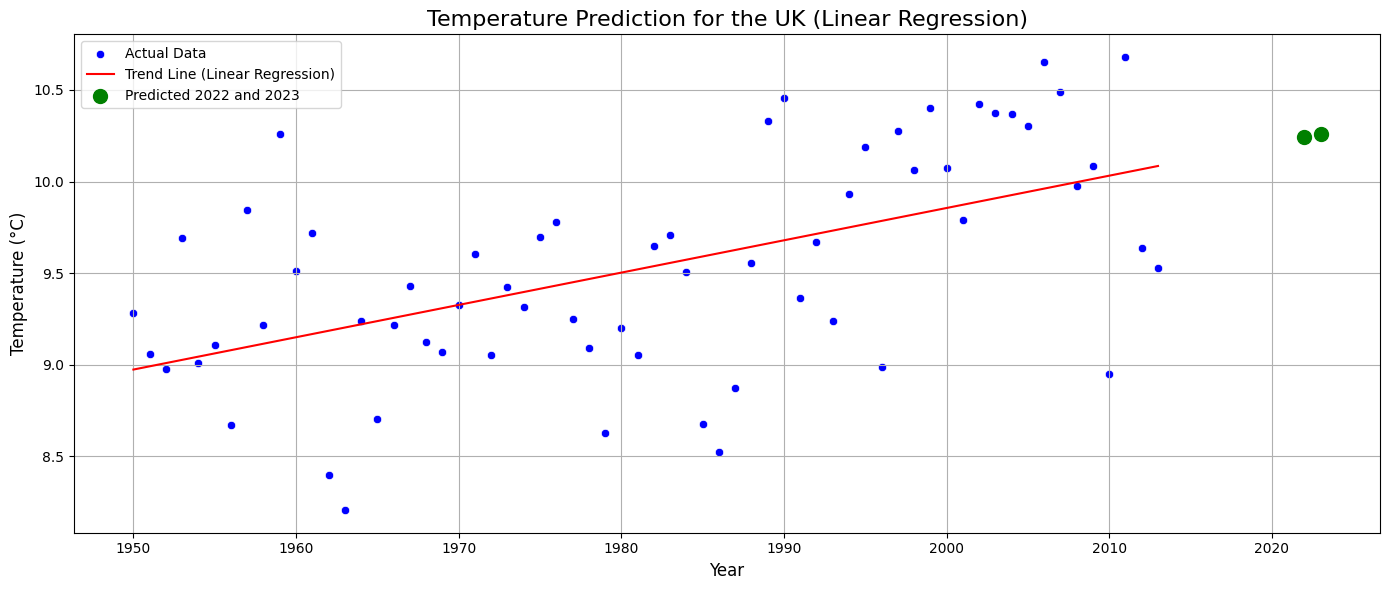

In [52]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict temperature for 2022 and 2023
future_years = [2022, 2023]
predicted_linear = linear_model.predict(np.array(future_years).reshape(-1, 1))

print(f"\nLinear Regression Predicted Temperature for the UK in 2022: {predicted_linear[0]:.2f} °C")
print(f"Linear Regression Predicted Temperature for the UK in 2023: {predicted_linear[1]:.2f} °C")

# Plot Linear Regression prediction vs actual
plt.figure(figsize=(14, 6))
sns.scatterplot(x=recent_data['Year'], y=recent_data['AverageTemperature'], label='Actual Data', color='blue')
plt.plot(recent_data['Year'], linear_model.predict(X), label='Trend Line (Linear Regression)', color='red')
plt.scatter(future_years, predicted_linear, color='green', s=100, label=f'Predicted {future_years[0]} and {future_years[1]}')
plt.title('Temperature Prediction for the UK (Linear Regression)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Predicted UK temperature in 2014: 9.86 °C
Predicted UK temperature in 2015: 9.92 °C


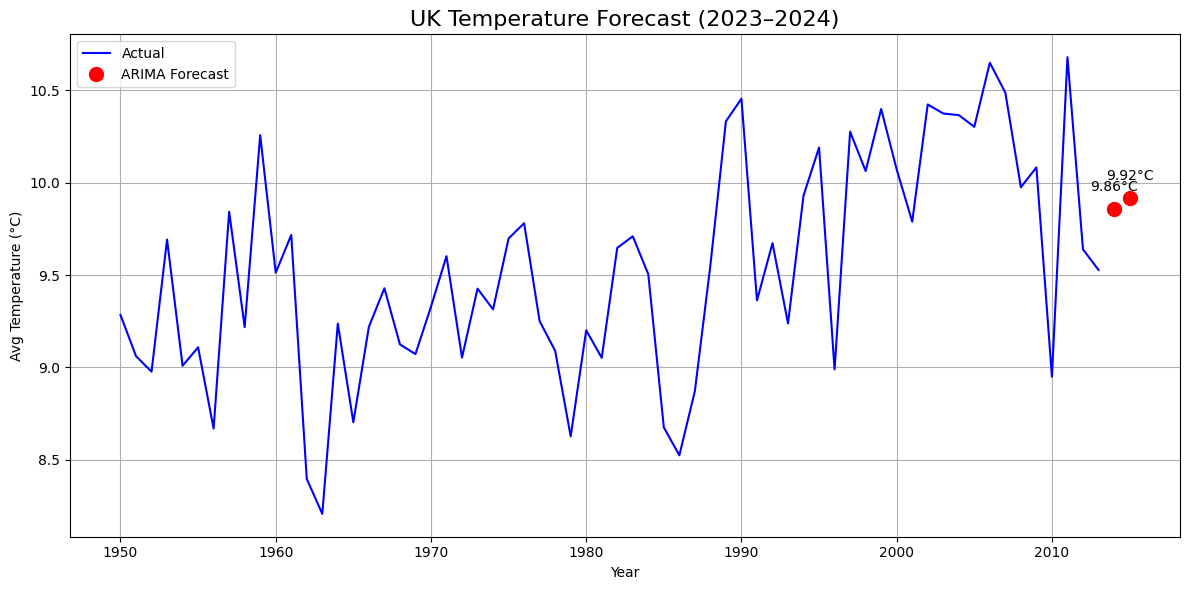

In [53]:
# Use data from 1950 onwards
train = yearly_avg[yearly_avg['Year'] >= 1950]

# Fit ARIMA model and forecast next 2 years
model = ARIMA(train['AverageTemperature'], order=(1, 1, 1)).fit()
forecast = model.forecast(steps=2)

# Forecast years (e.g., 2023 and 2024)
future_years = np.arange(train['Year'].max() + 1, train['Year'].max() + 3)

# Print predictions
for year, temp in zip(future_years, forecast):
    print(f"Predicted UK temperature in {year}: {temp:.2f} °C")

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
sns.lineplot(x=train['Year'], y=train['AverageTemperature'], label='Actual', color='blue')
plt.plot(future_years, forecast, 'o', color='RED', label='ARIMA Forecast',markersize=10)

# Annotate forecast values
for year, temp in zip(future_years, forecast):
    plt.text(year, temp + 0.1, f"{temp:.2f}°C", ha='center', fontsize=10)

# Final plot formatting
plt.title('UK Temperature Forecast (2023–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Avg Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
